In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-learning-az-ann/Churn_Modelling.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import sklearn

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
data = pd.read_csv("/kaggle/input/deep-learning-az-ann/Churn_Modelling.csv")

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
X = data.iloc[:,3:-1]

In [9]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [10]:
y = data.iloc[:,-1]

In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [13]:
le = LabelEncoder()
encoded = X.apply(le.fit_transform)

In [14]:
X = encoded.values

In [15]:
y = y.values

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [17]:
X

array([[0.49673203, 0.        , 0.        , ..., 1.        , 1.        ,
        0.50690138],
       [0.47276688, 1.        , 0.        , ..., 0.        , 1.        ,
        0.5640128 ],
       [0.24183007, 0.        , 0.        , ..., 1.        , 0.        ,
        0.57081416],
       ...,
       [0.69281046, 0.        , 0.        , ..., 0.        , 1.        ,
        0.20624125],
       [0.83006536, 0.5       , 1.        , ..., 1.        , 0.        ,
        0.4639928 ],
       [0.87363834, 0.        , 0.        , ..., 1.        , 0.        ,
        0.18783757]])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=48,test_size=0.2)

In [19]:
from keras import Sequential,layers

In [20]:
model=Sequential([
    layers.Dense(64,input_dim=10,activation="relu"),
    layers.Dense(128,kernel_initializer='random_uniform',activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(256,kernel_initializer='random_uniform',activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(512,kernel_initializer='random_uniform',activation="relu"),
    layers.Dense(1,kernel_initializer='random_uniform',activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 512)               1

In [21]:
model.compile(
    optimizer="Adam",
    loss="binary_crossentropy",
    metrics=['accuracy','mae']
)

In [22]:
history= model.fit(X_train,
          y_train,
          epochs=100,
          batch_size=50,
          validation_data=(X_test,y_test),
          verbose=1)

Epoch 1/100
160/160 [==============================] - 3s 8ms/step - loss: 0.4340 - accuracy: 0.8135 - mae: 0.2697 - val_loss: 0.5773 - val_accuracy: 0.7925 - val_mae: 0.4308
Epoch 2/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3785 - accuracy: 0.8469 - mae: 0.2301 - val_loss: 0.4634 - val_accuracy: 0.7925 - val_mae: 0.2977
Epoch 3/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3661 - accuracy: 0.8484 - mae: 0.2236 - val_loss: 0.3960 - val_accuracy: 0.8290 - val_mae: 0.2588
Epoch 4/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3569 - accuracy: 0.8524 - mae: 0.2197 - val_loss: 0.3530 - val_accuracy: 0.8570 - val_mae: 0.2197
Epoch 5/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3523 - accuracy: 0.8564 - mae: 0.2122 - val_loss: 0.3551 - val_accuracy: 0.8585 - val_mae: 0.2140
Epoch 6/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3491 - accuracy: 0.8570 - mae: 0.2115 - val_loss

In [23]:
df=pd.DataFrame(history.history)

In [24]:
df

,loss,accuracy,mae,val_loss,val_accuracy,val_mae
0,0.433959,0.813500,0.269668,0.577298,0.7925,0.430792
1,0.378472,0.846875,0.230116,0.463433,0.7925,0.297674
2,0.366134,0.848375,0.223637,0.396038,0.8290,0.258812
3,0.356914,0.852375,0.219709,0.353018,0.8570,0.219712
4,0.352278,0.856375,0.212192,0.355107,0.8585,0.214041
...,...,...,...,...,...,...
95,0.127101,0.945625,0.079346,0.778268,0.8165,0.192958
96,0.132135,0.944250,0.081111,0.797936,0.8260,0.189860
97,0.126008,0.947125,0.077591,0.804632,0.8175,0.196837
98,0.128408,0.947750,0.078921,0.826369,0.8050,0.209798


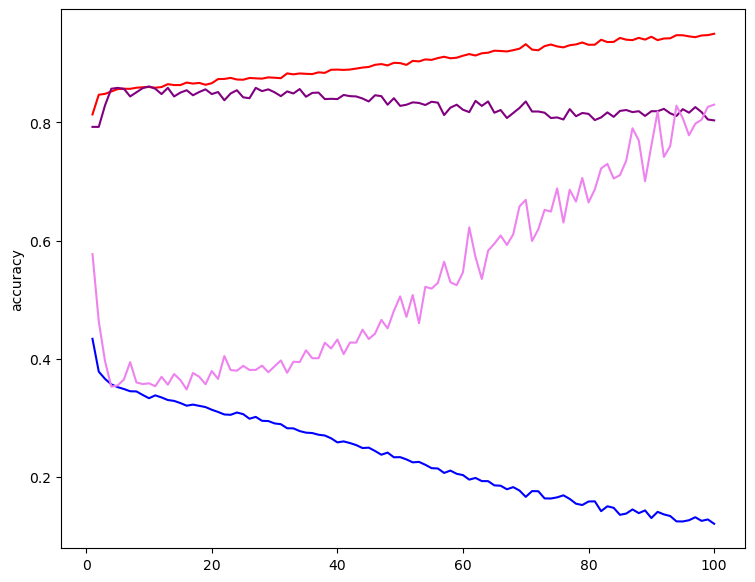

In [25]:
plt.figure(figsize=(30,7))
plt.subplot(1,3,1)
sns.lineplot(y=df.accuracy,x=range(1,101),color="red")
sns.lineplot(y=df.val_accuracy,x=range(1,101),color="purple")
sns.lineplot(y=df.loss,x=range(1,101),color="blue")
sns.lineplot(y=df.val_loss,x=range(1,101),color="violet")
plt.show()

In [26]:
model1=Sequential([
    layers.Dense(64,input_dim=10,activation="relu"),
    layers.Dense(128,kernel_initializer='random_uniform',activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(256,kernel_initializer='random_uniform',activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(512,kernel_initializer='random_uniform',activation="relu"),
    layers.Dense(1,kernel_initializer='random_uniform',activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 512)               1

In [27]:
model1.compile(
    optimizer="SGD",
    loss="binary_crossentropy",
    metrics=['accuracy','mae']
)

In [28]:
history1= model.fit(X_train,
          y_train,
          epochs=100,
          batch_size=50,
          validation_data=(X_test,y_test),
          verbose=1)

Epoch 1/100
160/160 [==============================] - 1s 6ms/step - loss: 0.1245 - accuracy: 0.9475 - mae: 0.0765 - val_loss: 0.7820 - val_accuracy: 0.8060 - val_mae: 0.2067
Epoch 2/100
160/160 [==============================] - 1s 6ms/step - loss: 0.1216 - accuracy: 0.9491 - mae: 0.0741 - val_loss: 0.8505 - val_accuracy: 0.8025 - val_mae: 0.2099
Epoch 3/100
160/160 [==============================] - 1s 6ms/step - loss: 0.1157 - accuracy: 0.9506 - mae: 0.0716 - val_loss: 0.8344 - val_accuracy: 0.8065 - val_mae: 0.2002
Epoch 4/100
160/160 [==============================] - 1s 6ms/step - loss: 0.1156 - accuracy: 0.9524 - mae: 0.0725 - val_loss: 0.8764 - val_accuracy: 0.8165 - val_mae: 0.1893
Epoch 5/100
160/160 [==============================] - 1s 6ms/step - loss: 0.1169 - accuracy: 0.9499 - mae: 0.0728 - val_loss: 0.8575 - val_accuracy: 0.8205 - val_mae: 0.1865
Epoch 6/100
160/160 [==============================] - 1s 6ms/step - loss: 0.1072 - accuracy: 0.9579 - mae: 0.0663 - val_loss

In [29]:
df1=pd.DataFrame(history1.history)

In [30]:
df1

,loss,accuracy,mae,val_loss,val_accuracy,val_mae
0,0.124471,0.947500,0.076484,0.781983,0.8060,0.206701
1,0.121564,0.949125,0.074088,0.850493,0.8025,0.209906
2,0.115743,0.950625,0.071646,0.834416,0.8065,0.200170
3,0.115620,0.952375,0.072481,0.876439,0.8165,0.189281
4,0.116914,0.949875,0.072772,0.857467,0.8205,0.186455
...,...,...,...,...,...,...
95,0.064220,0.975000,0.036844,1.210333,0.8170,0.189215
96,0.066241,0.974875,0.038323,1.184378,0.8130,0.192100
97,0.048436,0.980750,0.031266,1.258249,0.8140,0.187386
98,0.063672,0.977500,0.035073,1.296118,0.8190,0.188935


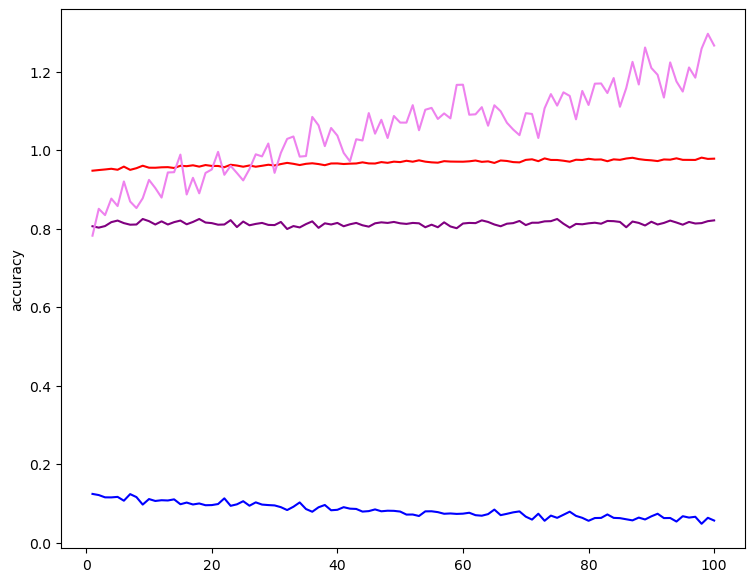

In [31]:
plt.figure(figsize=(30,7))
plt.subplot(1,3,1)
sns.lineplot(y=df1.accuracy,x=range(1,101),color="red")
sns.lineplot(y=df1.val_accuracy,x=range(1,101),color="purple")
sns.lineplot(y=df1.loss,x=range(1,101),color="blue")
sns.lineplot(y=df1.val_loss,x=range(1,101),color="violet")
plt.show()